In [7]:
# import networkx
import lovelyplots
import networkx as nx
import numpy as np
import rustworkx as rx
import scienceplots
from rustworkx.visualization import graphviz_draw, mpl_draw
from scipy.optimize import minimize

from corral_crowding.allocation_optimizer import GateFidelityOptimizer
from corral_crowding.detuning_fit import compute_infidelity_parameters, decay_fit
from corral_crowding.module_graph import QuantumModuleGraph

Qubit Frequencies: [3.33, 5.7, 4.04, 5.3] GHz
SNAIL Frequency: 4.69 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'):2.370000 GHz → Infidelity: 0.007113
  Gate ('Q0', 'Q2'):0.710000 GHz → Infidelity: 0.273874
  Gate ('Q0', 'Q3'):1.970000 GHz → Infidelity: 0.082833
  Gate ('Q1', 'Q2'):1.660000 GHz → Infidelity: 0.513774
  Gate ('Q1', 'Q3'):0.400000 GHz → Infidelity: 0.032723
  Gate ('Q2', 'Q3'):1.260000 GHz → Infidelity: 0.090538

Average Gate Infidelity: 0.079136


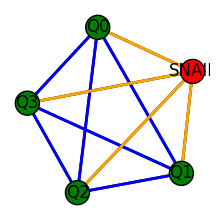

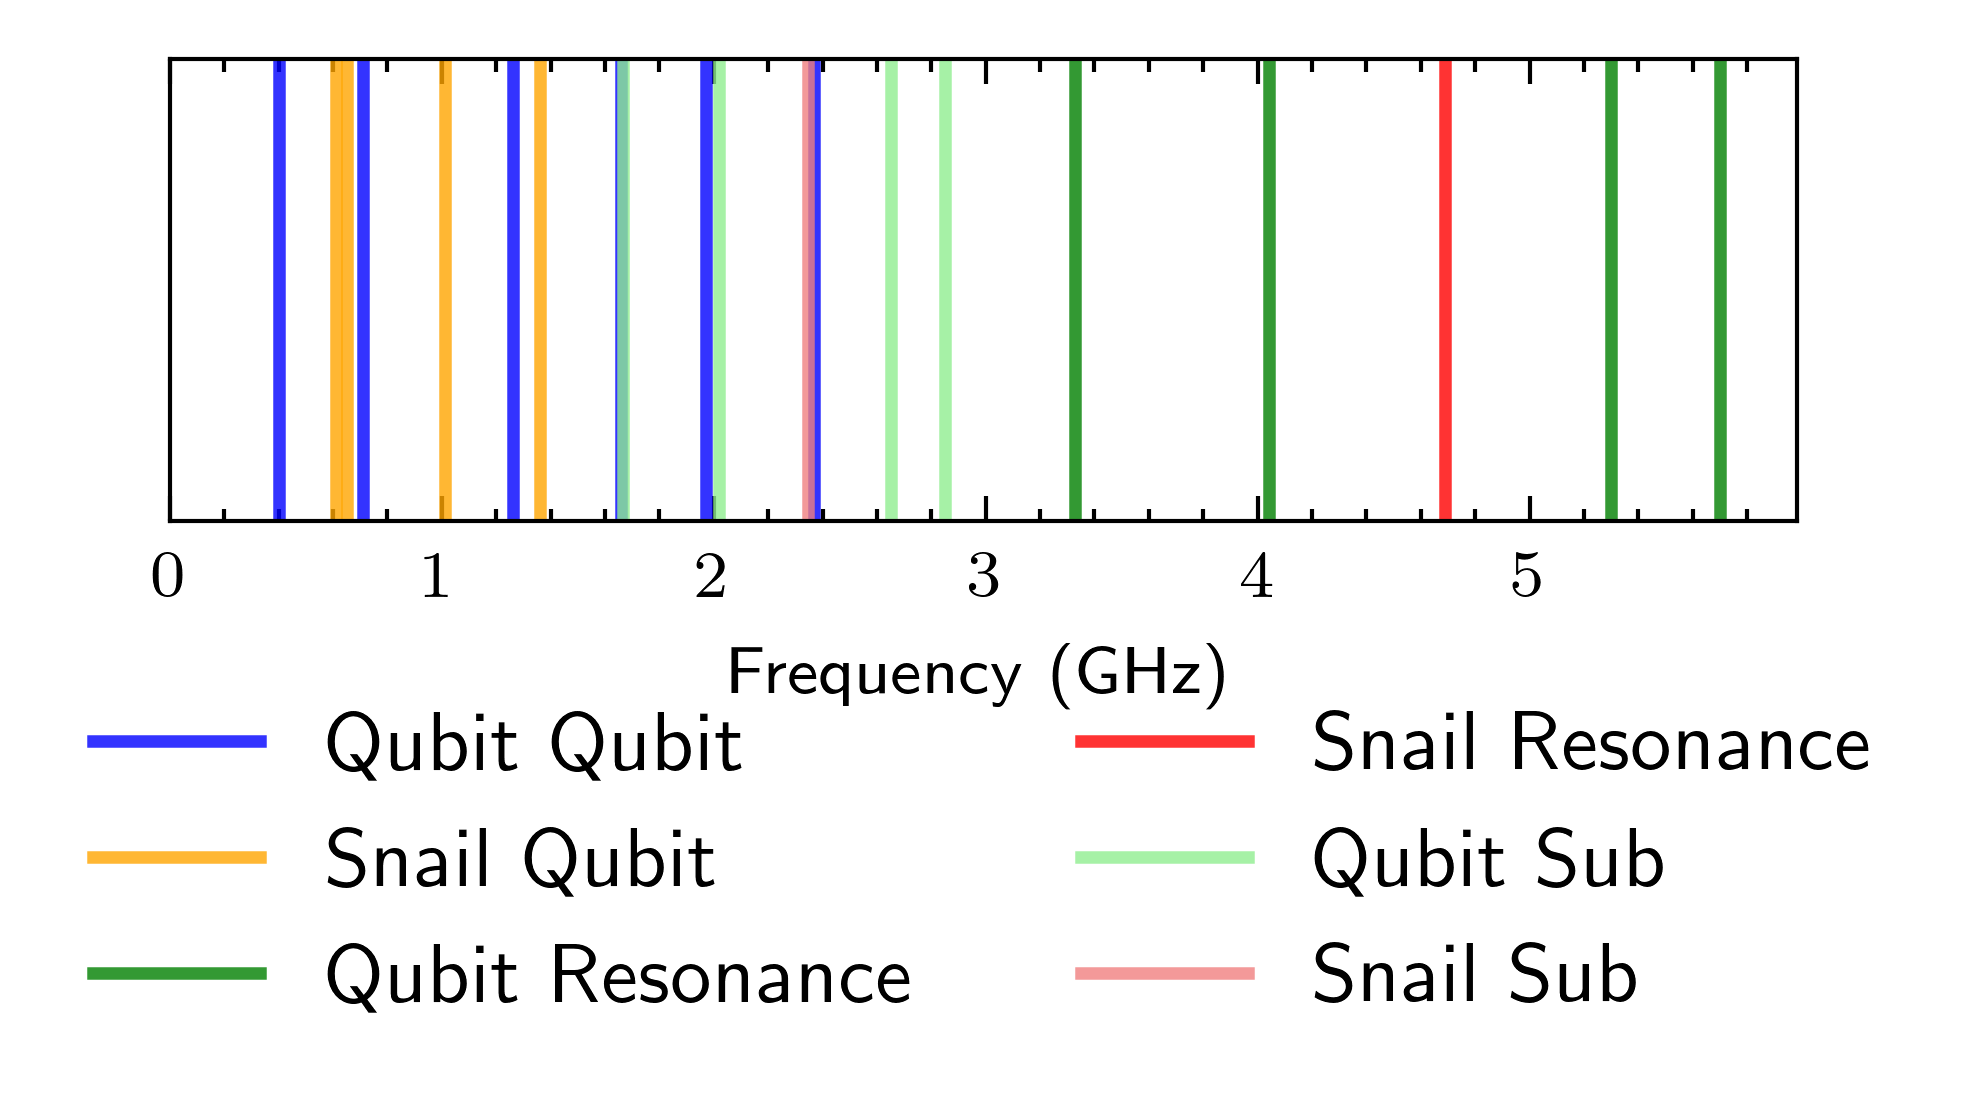

In [8]:
# baseline from Israa+Gaurav initial designs
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
optimizer.best_frequencies = [3.33, 5.70, 4.04, 5.3, 4.69]
optimizer.report_results()

100%|██████████| 64/64 [00:05<00:00, 11.09it/s]

Maximum number of function evaluations has been exceeded.
Qubit Frequencies: [5.69999602 3.3010177  5.49999602 5.17831341] GHz
SNAIL Frequency: 4.280815451415181 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'):2.398978 GHz → Infidelity: 0.010510
  Gate ('Q0', 'Q2'):0.200000 GHz → Infidelity: 0.004425
  Gate ('Q0', 'Q3'):0.521683 GHz → Infidelity: 0.012080
  Gate ('Q1', 'Q2'):2.198978 GHz → Infidelity: 0.006204
  Gate ('Q1', 'Q3'):1.877296 GHz → Infidelity: 0.012009
  Gate ('Q2', 'Q3'):0.321683 GHz → Infidelity: 0.006067

Average Gate Infidelity: 0.007958


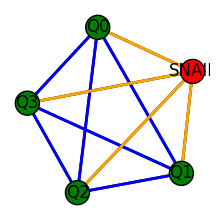

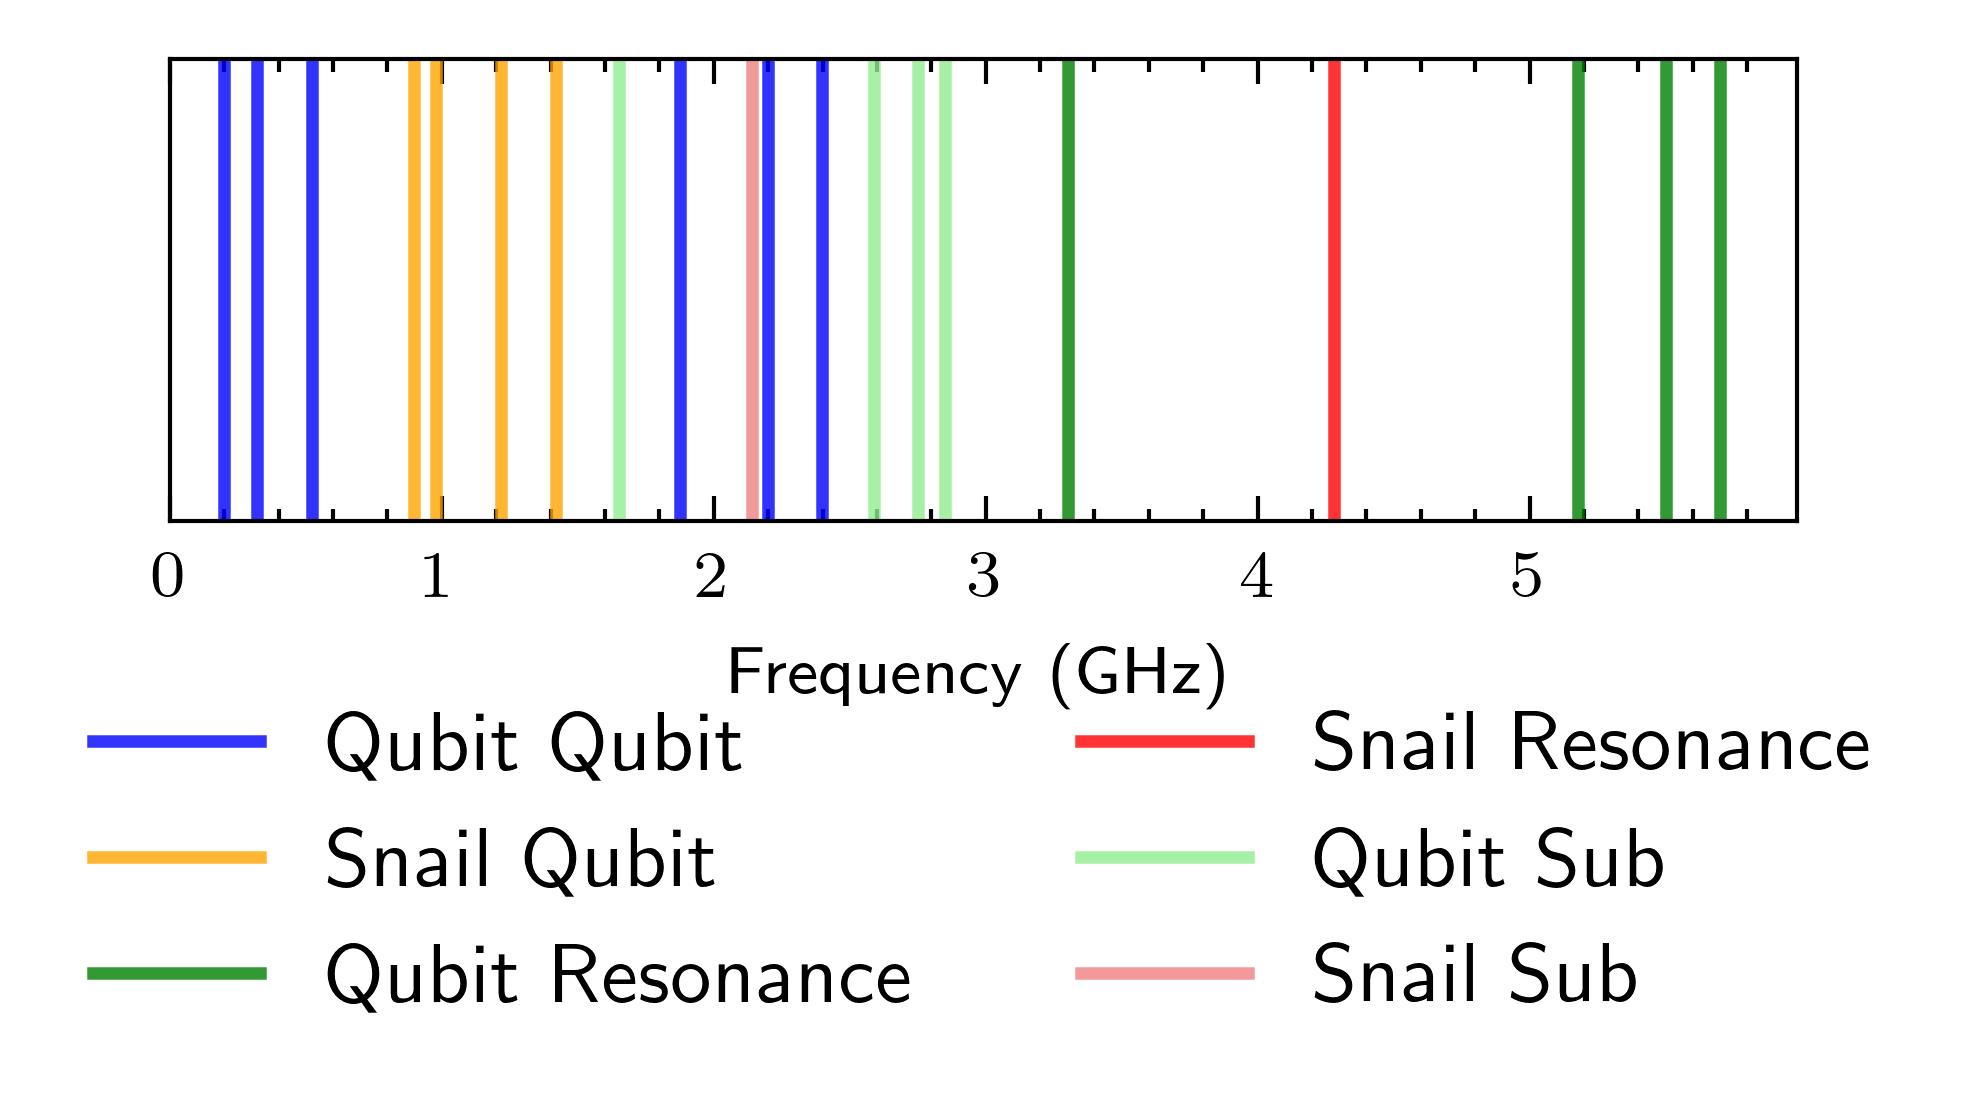

In [9]:
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

Remaining standard module sizes:

100%|██████████| 64/64 [00:00<00:00, 180.57it/s]


Optimization terminated successfully.
Qubit Frequencies: [5.49999812 5.69999954] GHz
SNAIL Frequency: 4.200000000000001 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'):0.200001 GHz → Infidelity: 0.001176

Average Gate Infidelity: 0.001176


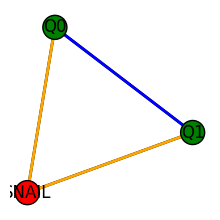

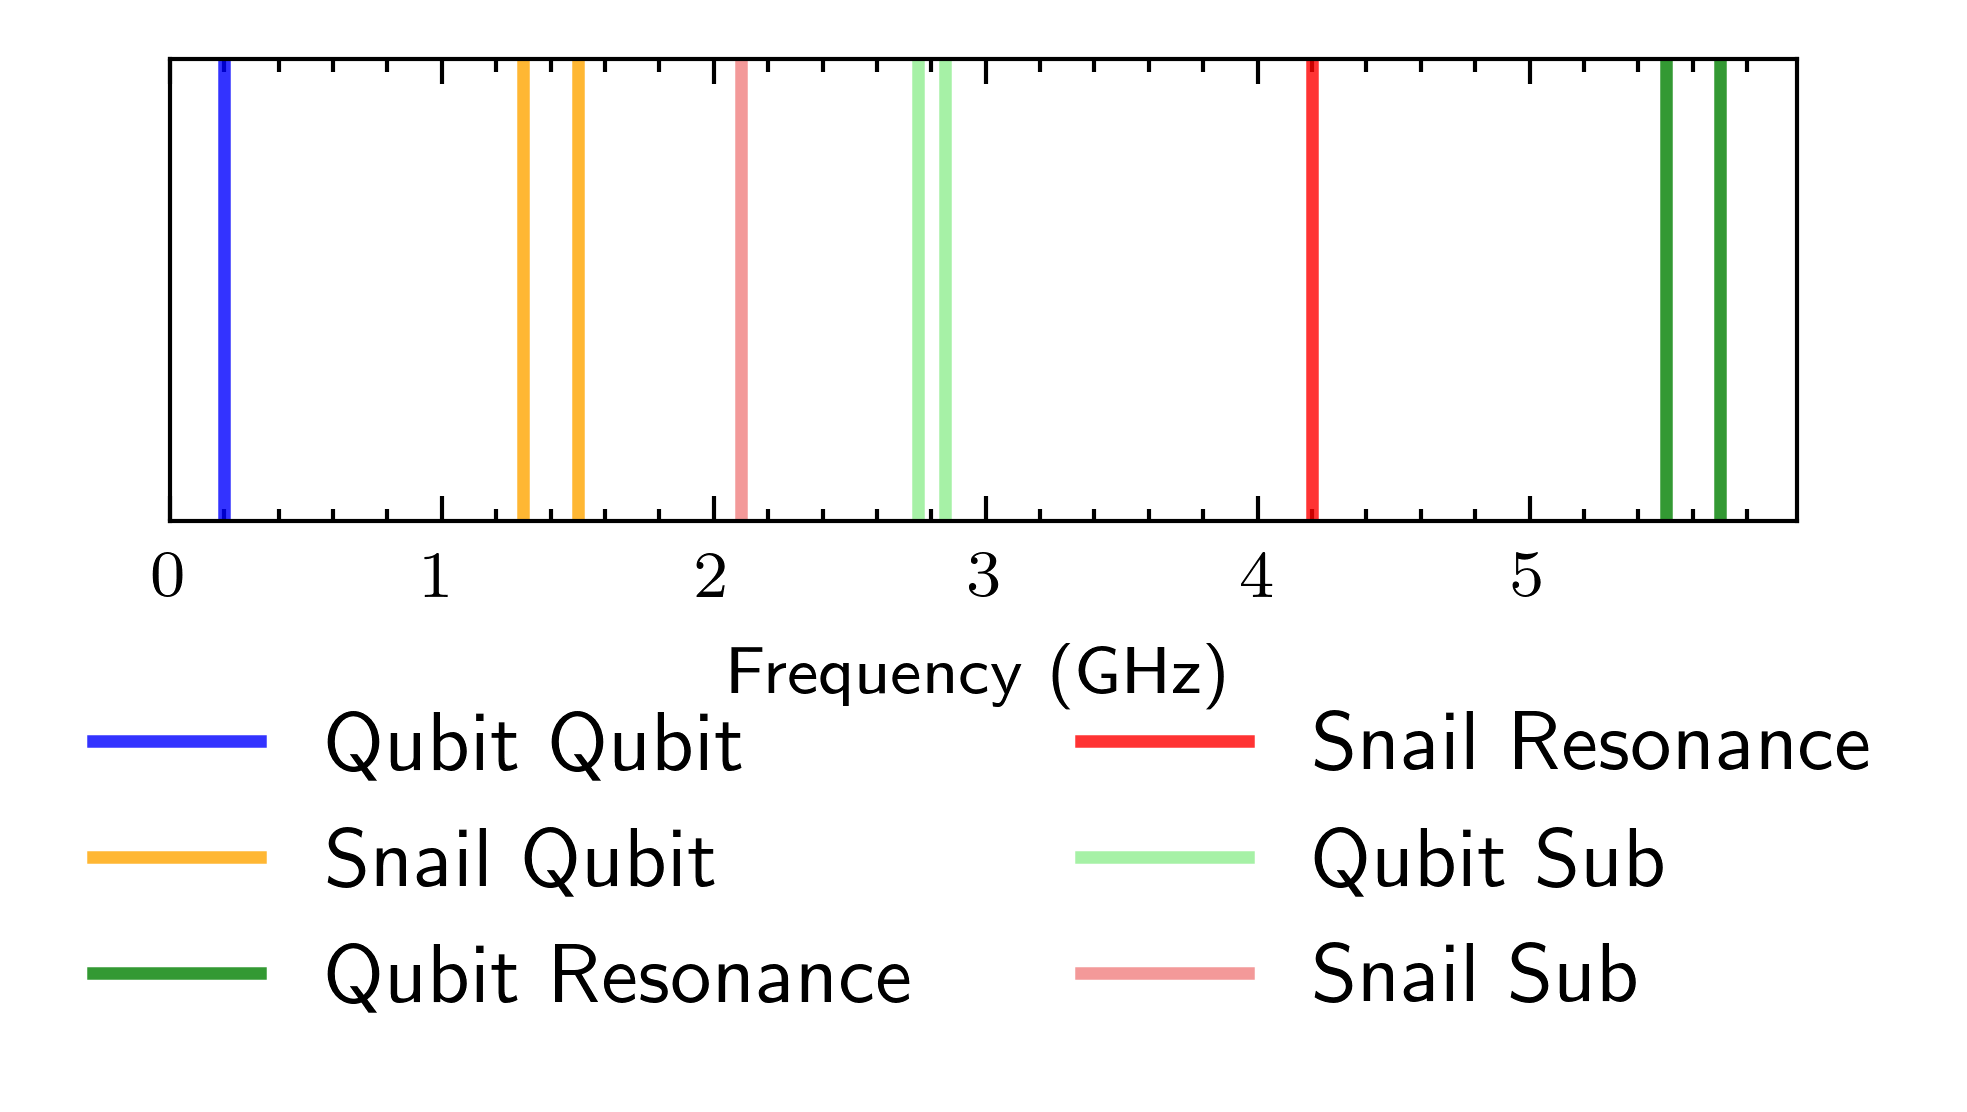

In [10]:
module = QuantumModuleGraph(num_qubits=2)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

100%|██████████| 64/64 [00:01<00:00, 35.78it/s]

Optimization terminated successfully.
Qubit Frequencies: [5.6918856  5.49188559 3.30874235] GHz
SNAIL Frequency: 4.460990050463199 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'):0.200000 GHz → Infidelity: 0.002897
  Gate ('Q0', 'Q2'):2.383143 GHz → Infidelity: 0.004359
  Gate ('Q1', 'Q2'):2.183143 GHz → Infidelity: 0.004001

Average Gate Infidelity: 0.003697


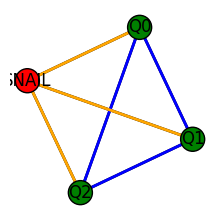

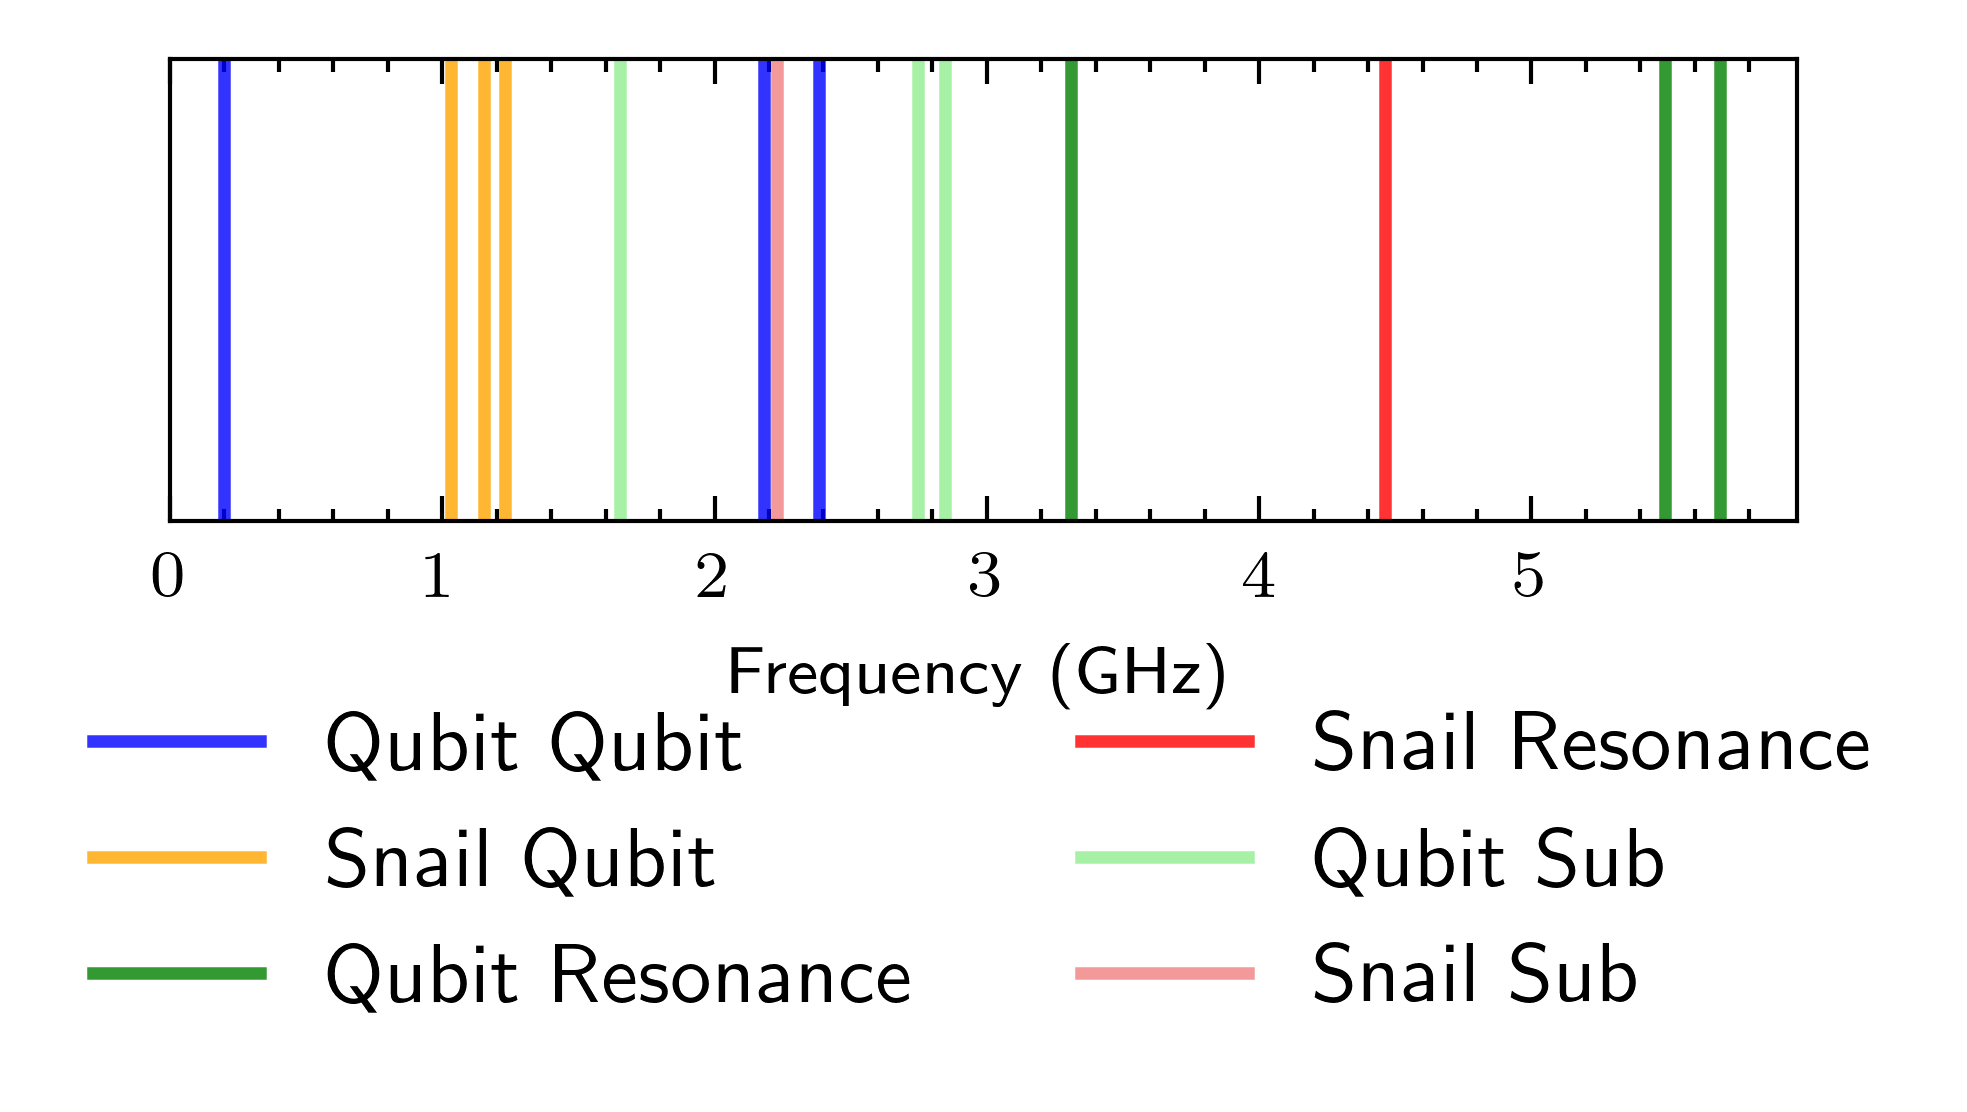

In [11]:
module = QuantumModuleGraph(num_qubits=3)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

100%|██████████| 64/64 [00:14<00:00,  4.37it/s]

Optimization terminated successfully.
Qubit Frequencies: [3.60845365 5.21067723 5.03105055 5.63078274 3.3083482 ] GHz
SNAIL Frequency: 4.310154143209708 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'):1.602224 GHz → Infidelity: 0.091579
  Gate ('Q0', 'Q2'):1.422597 GHz → Infidelity: 0.085762
  Gate ('Q0', 'Q3'):2.022329 GHz → Infidelity: 0.011262
  Gate ('Q0', 'Q4'):0.300105 GHz → Infidelity: 0.014114
  Gate ('Q1', 'Q2'):0.179627 GHz → Infidelity: 0.009124
  Gate ('Q1', 'Q3'):0.420106 GHz → Infidelity: 0.025289
  Gate ('Q1', 'Q4'):1.902329 GHz → Infidelity: 0.029825
  Gate ('Q2', 'Q3'):0.599732 GHz → Infidelity: 0.135464
  Gate ('Q2', 'Q4'):1.722702 GHz → Infidelity: 0.079983
  Gate ('Q3', 'Q4'):2.322435 GHz → Infidelity: 0.011983

Average Gate Infidelity: 0.031970


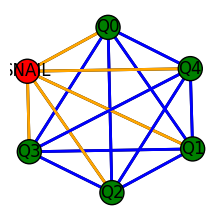

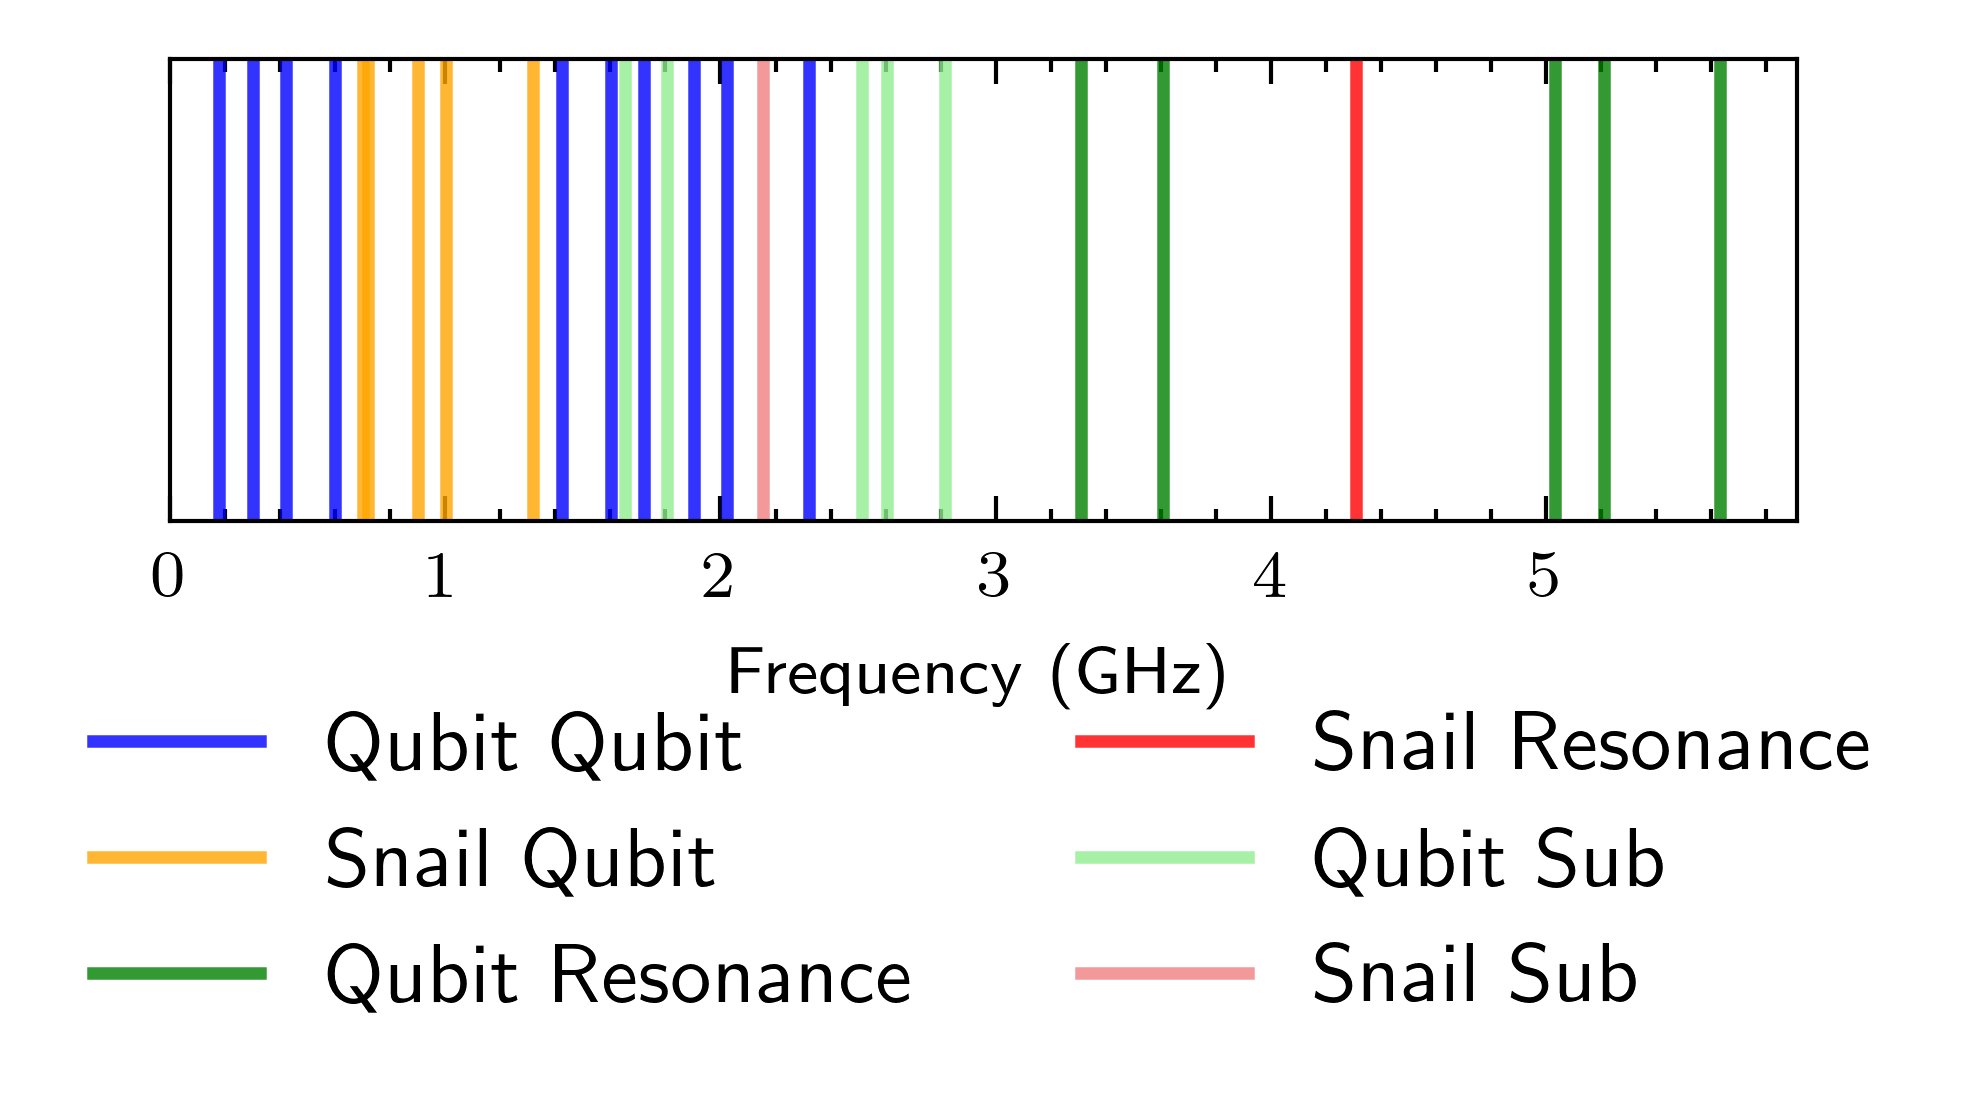

In [12]:
module = QuantumModuleGraph(num_qubits=5)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()